<a href="https://colab.research.google.com/github/andrewbilbrey/Billboard-Song-Data-Assignment-6-/blob/master/assignments/assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Jupyter notebook in Google Colab named "assignment_08.ipynb"

Use the following URL to directly load data from the source URL: https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv

Only load two columns:  CONTROL (ownership type), MD_EARN_WNE_P10 (potential earning)

Filter the data so you have only public institutions (using CONTROL variable)

Drop the colleges that have zero or missing potential earnings. The remaining colleges constitute the population for which we are to perform interval estimation.

Get a random sample of 50 colleges from the population.

Calculate the sample mean and sample standard error.

Calculate the confidence intervals of the mean estimate at 68%, 95%. and 99.7% confidence level

Calculate the population mean.
Compare the population mean with the sample mean - display the difference

Check the confidence intervals and determine if the population mean is within the confidence intervals calculated above. You don't need to write code, just check using your eyes.

Start from step 6 again with a larger sample of 100 colleges

Observe the difference of confidence intervals between sample size 50 and sample size 100. Draw some conclusions. 

Save the notebook to your GitHub repository. 

Submit the link of the notebook in Blackboard.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import math

In [3]:
df = pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv', usecols = ["CONTROL", "MD_EARN_WNE_P10"])
df

,CONTROL,MD_EARN_WNE_P10
0,1,31000
1,1,41200
2,2,39600
3,1,46700
4,1,27700
...,...,...
6801,1,NaN
6802,1,NaN
6803,3,NaN
6804,3,NaN


In [10]:
df = df[df.CONTROL == 1]
df = df.dropna()
df

,CONTROL,MD_EARN_WNE_P10
0,1,31000
1,1,41200
3,1,46700
4,1,27700
5,1,44500
...,...,...
6607,1,50600
6608,1,50600
6609,1,50600
6615,1,32000


In [14]:
df1 = df[df.MD_EARN_WNE_P10 != 'PrivacySuppressed']
df1['MD_EARN_WNE_P10'].value_counts()

50100    25
30100    20
33900    19
33200    18
34900    18
         ..
86500     1
24000     1
56500     1
55000     1
95600     1
Name: MD_EARN_WNE_P10, Length: 393, dtype: int64

In [30]:
df1 = df1.astype(int)
df1.describe()

,CONTROL,MD_EARN_WNE_P10
count,1853.0,1853.000000
mean,1.0,36083.216406
std,0.0,13464.472651
min,1.0,10800.000000
25%,1.0,29000.000000
50%,1.0,33500.000000
75%,1.0,39800.000000
max,1.0,241900.000000


In [37]:
sample_size = 50
df_sample = df1.sample(sample_size)
sample_mean = df_sample["MD_EARN_WNE_P10"].mean()
sample_std = df_sample["MD_EARN_WNE_P10"].std()
std_err = sample_std / math.sqrt(sample_size)
print("The sample mean is: " , sample_mean, ". The sample standard error is: ", round(std_err, 2) )

The sample mean is:  37348.0 . The sample standard error is:  2096.75


# Calculate the confidence intervals of the mean estimate at 68%, 95%. and 99.7% confidence level

In [38]:
LCL_68 = sample_mean -  std_err
UCL_68 = sample_mean +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  35251.25
Upper confidence limit at 68% confidence level =  39444.75


In [39]:
LCL_95 = sample_mean -  2 * std_err
UCL_95 = sample_mean +  2 * std_err
print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))

Lower confidence limit at 95% confidence level =  33154.5
Upper confidence limit at 95% confidence level =  41541.5


In [40]:
LCL_997 = sample_mean -  3 * std_err
UCL_997 = sample_mean +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  31057.75
Upper confidence limit at 99.7% confidence level =  43638.25


#Calculate the population mean.


In [62]:
pop_mean = df1["MD_EARN_WNE_P10"].mean()
pop_mean

36083.21640582839

# Compare the population mean with the sample mean - display the difference

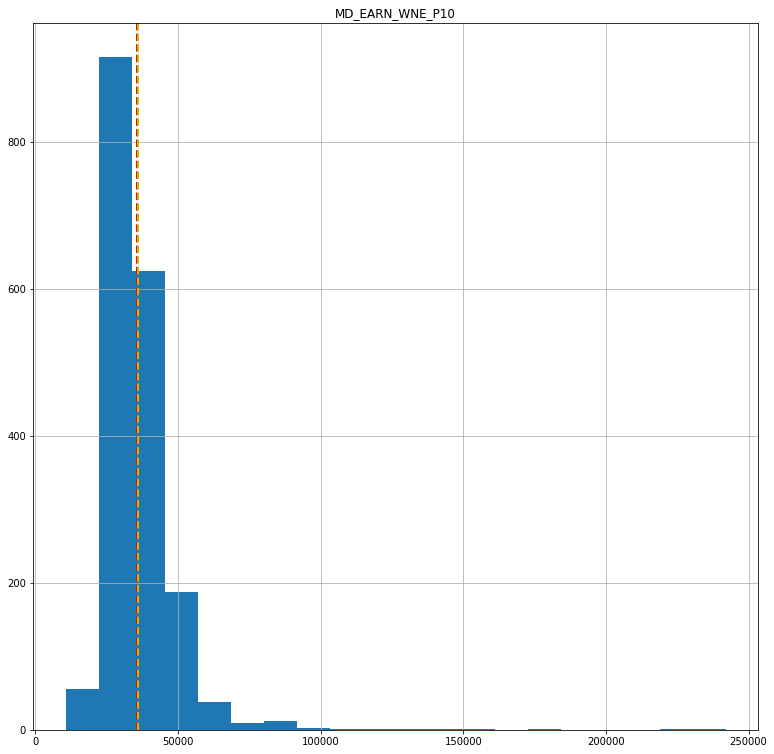

In [71]:
df1.hist(column = "MD_EARN_WNE_P10", figsize= (13,13), bins= 20)
plt.axvline(sample_mean, color= 'r', linestyle='dashed', linewidth = 2)
plt.axvline(pop_mean, color= 'y', linestyle='dashed', linewidth = 2)
#need to make difference more clear in the graph.

# Start from step 6 again with a larger sample of 100 colleges


In [72]:
sample_size1 = 100
df_sample1 = df1.sample(sample_size1)
sample_mean1 = df_sample1["MD_EARN_WNE_P10"].mean()
sample_std1 = df_sample1["MD_EARN_WNE_P10"].std()
std_err1 = sample_std1 / math.sqrt(sample_size1)
print("The sample mean is: " , sample_mean1, ". The sample standard error is: ", round(std_err1, 2) )

The sample mean is:  35284.0 . The sample standard error is:  1058.18


In [73]:
LCL_681 = sample_mean1 -  std_err1
UCL_681 = sample_mean1 +  std_err1

print("Lower confidence limit at 68% confidence level = ", round(LCL_681,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_681,2))

Lower confidence limit at 68% confidence level =  34225.82
Upper confidence limit at 68% confidence level =  36342.18


In [74]:
LCL_951 = sample_mean1 -  2 * std_err1
UCL_951 = sample_mean1 +  2 * std_err1
print("Lower confidence limit at 95% confidence level = ", round(LCL_951,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_951,2))

Lower confidence limit at 95% confidence level =  33167.63
Upper confidence limit at 95% confidence level =  37400.37


In [75]:
LCL_9971 = sample_mean1 -  3 * std_err1
UCL_9971 = sample_mean1 +  3 * std_err1
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_9971,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_9971,2))

Lower confidence limit at 99.7% confidence level =  32109.45
Upper confidence limit at 99.7% confidence level =  38458.55


In [76]:
df1["MD_EARN_WNE_P10"].mean()

36083.21640582839

# Question 13: The difference of confidence intervals between sample size 50 and sample size 100 is that at sample size 100, the confidence intervals are smaller. This is because we have a better idea of the data with larger sample size.